<a href="https://colab.research.google.com/github/snad0/object-detection-yolo/blob/main/Head_Helmet_detection_Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
from IPython.display import Image

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11983, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 11983 (delta 17), reused 25 (delta 17), pack-reused 11953
Receiving objects: 100% (11983/11983), 12.49 MiB | 28.68 MiB/s, done.
Resolving deltas: 100% (8241/8241), done.


In [4]:
%cd yolov5

/content/yolov5


In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.7 MB/s 


In [6]:
import numpy as np
import os
import shutil
from pathlib import Path
from PIL import Image

In [7]:
!unzip /content/yolov5/dataset.zip -d /content/dataset

Archive:  /content/yolov5/dataset.zip
   creating: /content/dataset/dataset/images/
   creating: /content/dataset/dataset/images/train/
  inflating: /content/dataset/dataset/images/train/helm_000000.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000001.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000002.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000003.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000004.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000005.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000006.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000007.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000008.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000009.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000011.jpg  
  inflating: /content/dataset/dataset/images/train/helm_000012.jpg  
  inflating: /content/dataset/datase

In [ ]:
images=[]
xmls=[]


images_path='images'
label_path='annotations'

train_ratio=0.8
val_ratio=0.2

total_image_count=int(len(os.listdir(images_path))*0.10)
#4700*0.20=940 images
training_count=int(total_image_count*train_ratio)
validation_count=int(total_image_count*val_ratio)

In [ ]:
i=0
for (root, dirs ,img) in os.walk(images_path):
    for filename in img:
        if i <total_image_count:
            images.append(filename)
            i=i+1
j=0
for (root, dirs ,files) in os.walk(label_path):
    for label in files:
        if j <total_image_count:
            xmls.append(label)
            j=j+1

In [ ]:
from random import choice
train_img_path='dataset/images/train'
val_img_path='dataset/images/val'
train_label_path='dataset/labels/train'
val_label_path='dataset/labels/val'

for x in range(training_count):
    try:
        filejpg= choice(images)
        fileXml= filejpg[:-4]+'.txt'

        shutil.copy(os.path.join(images_path,filejpg), os.path.join(train_img_path,filejpg))
        shutil.copy(os.path.join(label_path,fileXml), os.path.join(train_label_path,fileXml))

        images.remove(filejpg)
        xmls.remove(fileXml)
    except:
        continue

for x in range(validation_count):
    try:
        filejpg= choice(images)
        fileXml= filejpg[:-4]+'.xml'

        shutil.copy(os.path.join(images_path,filejpg), os.path.join(val_img_path,filejpg))
        shutil.copy(os.path.join(label_path,fileXml), os.path.join(val_label_path,fileXml))

        images.remove(filejpg)
        xmls.remove(fileXml)
    except:
        continue 

In [ ]:
!pip install wandb

In [ ]:
print("=============")
%pwd
print("=============")
!python train.py --batch 16 --weights yolov5s.pt --data data.yaml --epochs 10 --img 415 --cache

In [ ]:
# model = torch.hub.load('ultralytics/yolov5', 'custom', path_or_model='your.pt')


In [14]:
from IPython.display import Image 

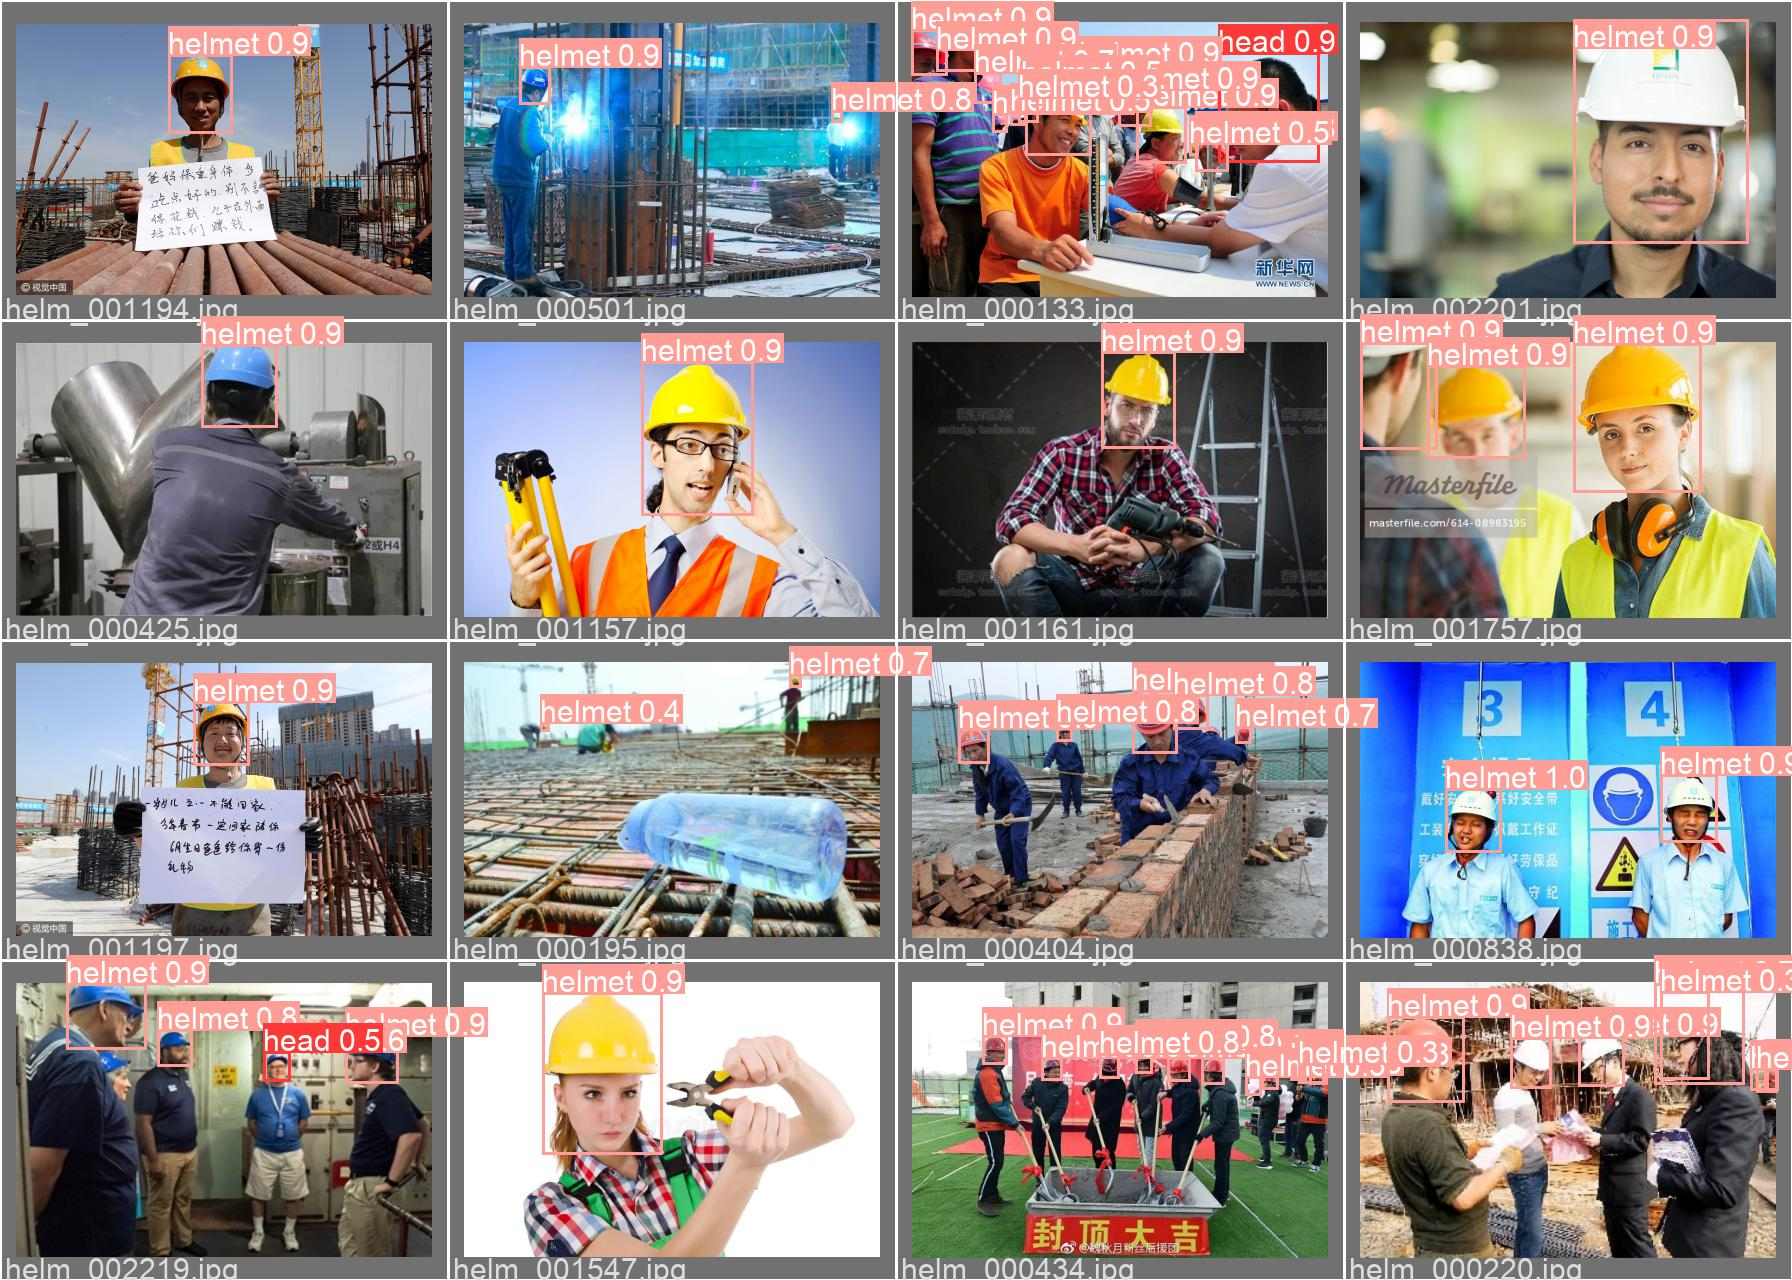

In [17]:
Image(filename='runs/train/exp/val_batch2_pred.jpg', width=1000)

In [ ]:
!python detect.py --source /content/drive/MyDrive/videoplayback1.mp4 --weights /content/yolov5/runs/train/exp/weights/best.pt

In [ ]:
from IPython.display import Video

Video("/content/yolov5/runs/detect/exp2/videoplayback1.mp4",)

In [26]:
!python detect.py --source /content/helm_022752.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/helm_022752.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-47-geab35f6 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/helm_022752.jpg: 384x640 1 head, 3 helmets, 12.2ms
Speed: 0.5ms pre-process, 12.2ms inference, 1.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


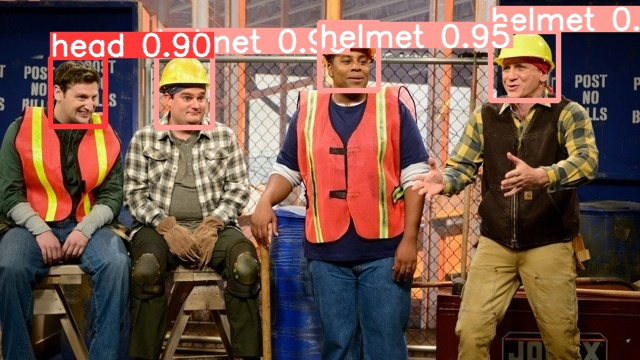

In [27]:
Image(filename='/content/yolov5/runs/detect/exp3/helm_022752.jpg', width=1000)